In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import os

from scripts.config import DATA_PATH, MODELS_PATH

from scripts.extract_preprocess_data import extract

%load_ext autoreload
%autoreload 2

%load_ext tensorboard

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
from scripts.model_att_v2log import AttentionModel

model_name = 'ATT_v2log_preproc_v5_20250922_203519'
preprocess_version = 'v5'

model = AttentionModel.from_saved_model(model_name)


Filtering windows from 2024-02-01 00:00:00+01:00 to 2024-02-07 23:59:59+01:00
Date range spans: 6 days 23:59:59
Number of windows: 7
[Timestamp('2024-02-01 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2024-02-02 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2024-02-03 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2024-02-04 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2024-02-05 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2024-02-06 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2024-02-07 12:00:00+0100', tz='Europe/Paris')]


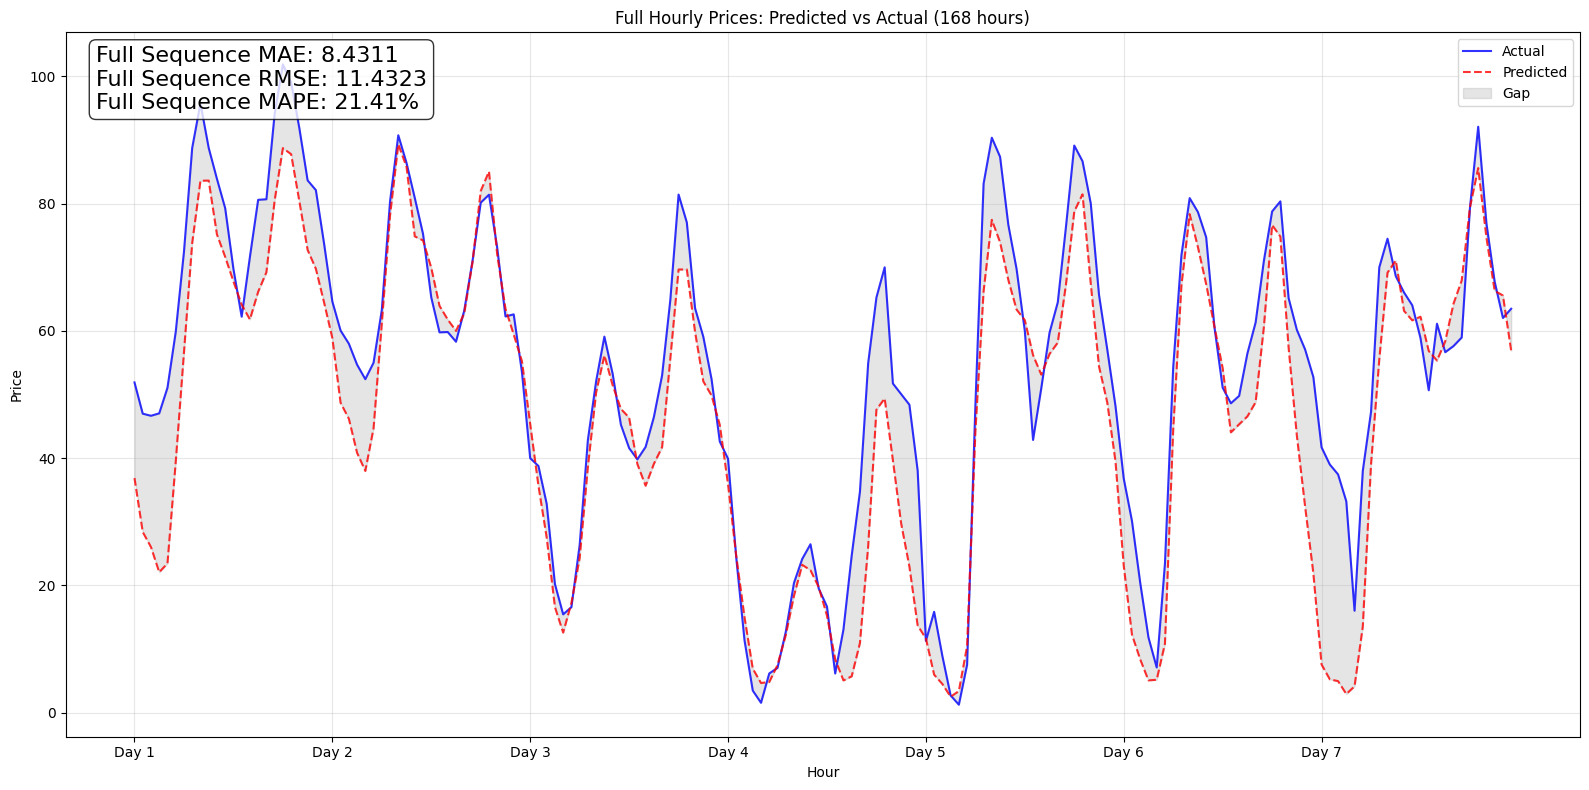

(array([ 51.9 ,  46.99,  46.66,  47.04,  51.06,  59.82,  72.42,  88.76,
         95.76,  88.77,  83.9 ,  79.29,  69.75,  62.23,  71.62,  80.6 ,
         80.69,  94.1 , 101.89,  99.05,  91.84,  83.66,  82.13,  73.69,
         64.62,  60.05,  58.  ,  54.69,  52.41,  55.  ,  63.27,  80.34,
         90.75,  86.39,  80.89,  75.25,  65.25,  59.77,  59.82,  58.3 ,
         63.2 ,  70.95,  80.16,  81.4 ,  73.06,  62.27,  62.6 ,  53.51,
         39.99,  38.77,  32.83,  20.22,  15.45,  16.58,  26.33,  42.87,
         52.09,  59.1 ,  53.28,  45.27,  41.58,  39.81,  41.76,  46.44,
         53.  ,  64.87,  81.43,  77.05,  63.57,  59.08,  52.42,  42.6 ,
         39.91,  24.29,  11.35,   3.47,   1.55,   6.16,   7.04,  12.68,
         20.39,  24.16,  26.47,  19.5 ,  16.68,   6.16,  13.07,  24.69,
         34.72,  54.93,  65.25,  69.99,  51.73,  50.06,  48.4 ,  38.08,
         11.28,  15.85,   8.91,   2.71,   1.25,   7.53,  48.09,  83.15,
         90.36,  87.36,  76.68,  69.74,  60.  ,  42.86,  51.  , 

In [11]:
X_future, X_past, y, X_future_transformed, X_past_transformed, past_times, future_times, future_window_dates = extract(
            date_from='01/02/2024', 
            date_to='07/02/2024', 
            preprocess_version=preprocess_version)

pred = model.predict(X_past_transformed, X_future_transformed)

model.plot_hourly_prices(y, pred)

Filtering windows from 2025-02-01 00:00:00+01:00 to 2025-02-07 23:59:59+01:00
Date range spans: 6 days 23:59:59
Number of windows: 7
[Timestamp('2025-02-01 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2025-02-02 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2025-02-03 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2025-02-04 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2025-02-05 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2025-02-06 12:00:00+0100', tz='Europe/Paris')
 Timestamp('2025-02-07 12:00:00+0100', tz='Europe/Paris')]


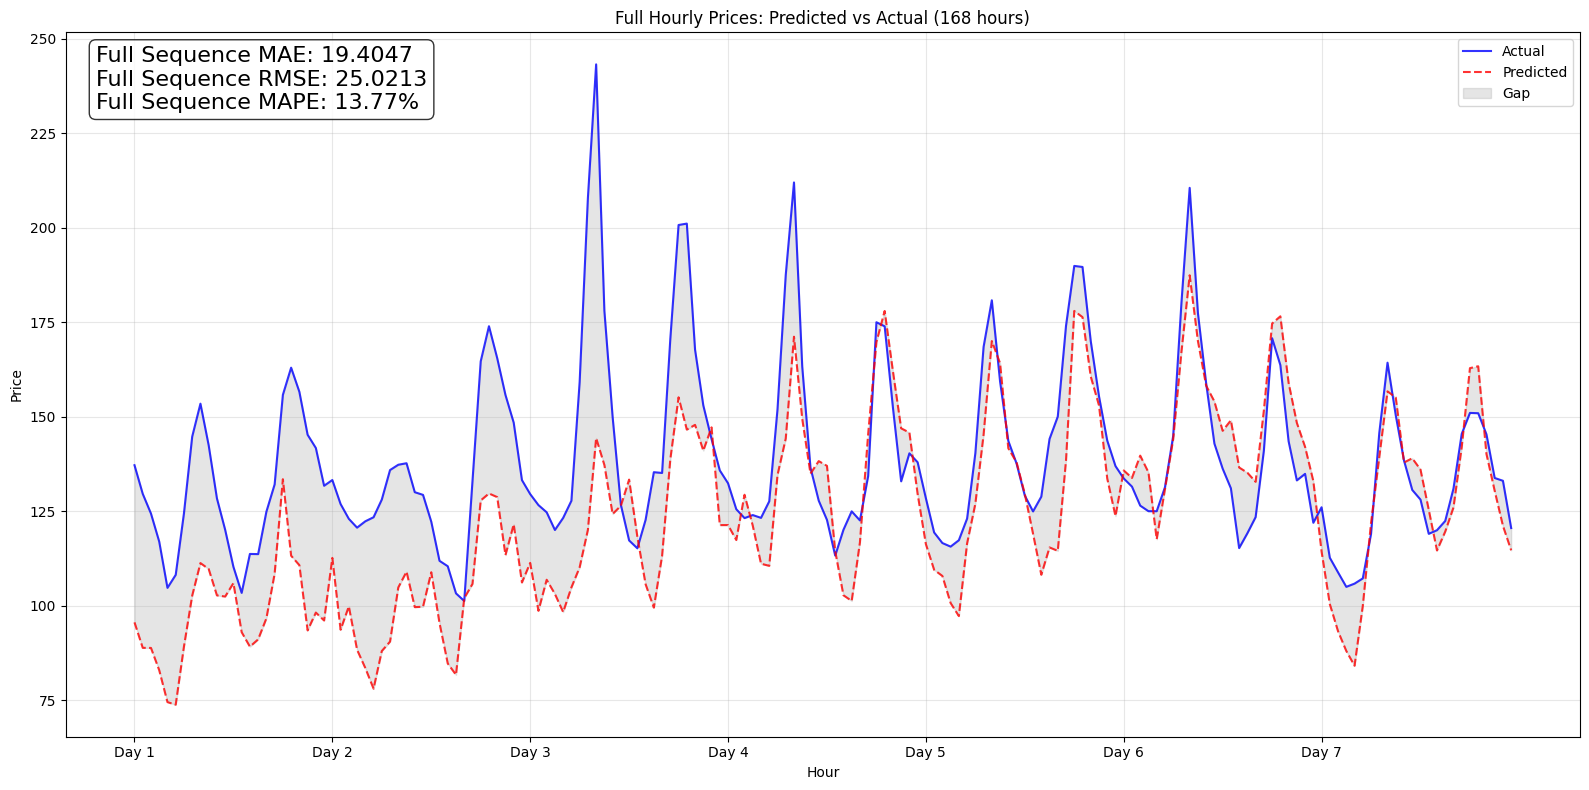

(array([137.18, 129.61, 124.38, 116.96, 104.73, 108.17, 124.45, 144.74,
        153.46, 142.44, 128.4 , 120.08, 110.29, 103.4 , 113.7 , 113.66,
        124.88, 132.1 , 155.79, 162.98, 156.6 , 145.24, 141.73, 131.74,
        133.26, 126.91, 122.99, 120.66, 122.34, 123.41, 128.09, 135.9 ,
        137.3 , 137.7 , 130.04, 129.33, 122.24, 111.88, 110.45, 103.27,
        101.26, 132.8 , 164.67, 173.95, 165.5 , 155.77, 148.44, 133.24,
        129.54, 126.63, 124.72, 120.04, 123.24, 127.77, 159.18, 207.88,
        243.23, 178.04, 149.95, 126.69, 117.27, 115.19, 122.73, 135.33,
        135.13, 170.64, 200.73, 201.1 , 167.74, 153.  , 144.09, 135.81,
        132.4 , 125.54, 123.18, 123.99, 123.25, 127.63, 151.95, 187.5 ,
        211.99, 163.31, 136.53, 127.8 , 122.71, 113.26, 120.09, 124.97,
        122.57, 134.32, 175.  , 173.92, 152.47, 132.91, 140.32, 137.95,
        128.44, 119.39, 116.59, 115.64, 117.33, 123.05, 140.34, 168.48,
        180.81, 159.33, 143.61, 137.61, 129.14, 124.95, 128.85, 

In [12]:
X_future, X_past, y, X_future_transformed, X_past_transformed, past_times, future_times, future_window_dates = extract(
            date_from='01/02/2025', 
            date_to='07/02/2025', 
            preprocess_version=preprocess_version)

pred = model.predict(X_past_transformed, X_future_transformed)

model.plot_hourly_prices(y, pred)

Filtering windows from 2025-06-01 00:00:00+02:00 to 2025-06-07 23:59:59+02:00
Date range spans: 6 days 23:59:59
Number of windows: 7
[Timestamp('2025-06-01 12:00:00+0200', tz='Europe/Paris')
 Timestamp('2025-06-02 12:00:00+0200', tz='Europe/Paris')
 Timestamp('2025-06-03 12:00:00+0200', tz='Europe/Paris')
 Timestamp('2025-06-04 12:00:00+0200', tz='Europe/Paris')
 Timestamp('2025-06-05 12:00:00+0200', tz='Europe/Paris')
 Timestamp('2025-06-06 12:00:00+0200', tz='Europe/Paris')
 Timestamp('2025-06-07 12:00:00+0200', tz='Europe/Paris')]


/home/ronan/code/Power_Price_Forecasting/research/scripts/model_att_v2log.py:902: RuntimeWarning: divide by zero encountered in divide
  mape_full = np.mean(np.abs((full_true - full_pred) / full_true)) * 100


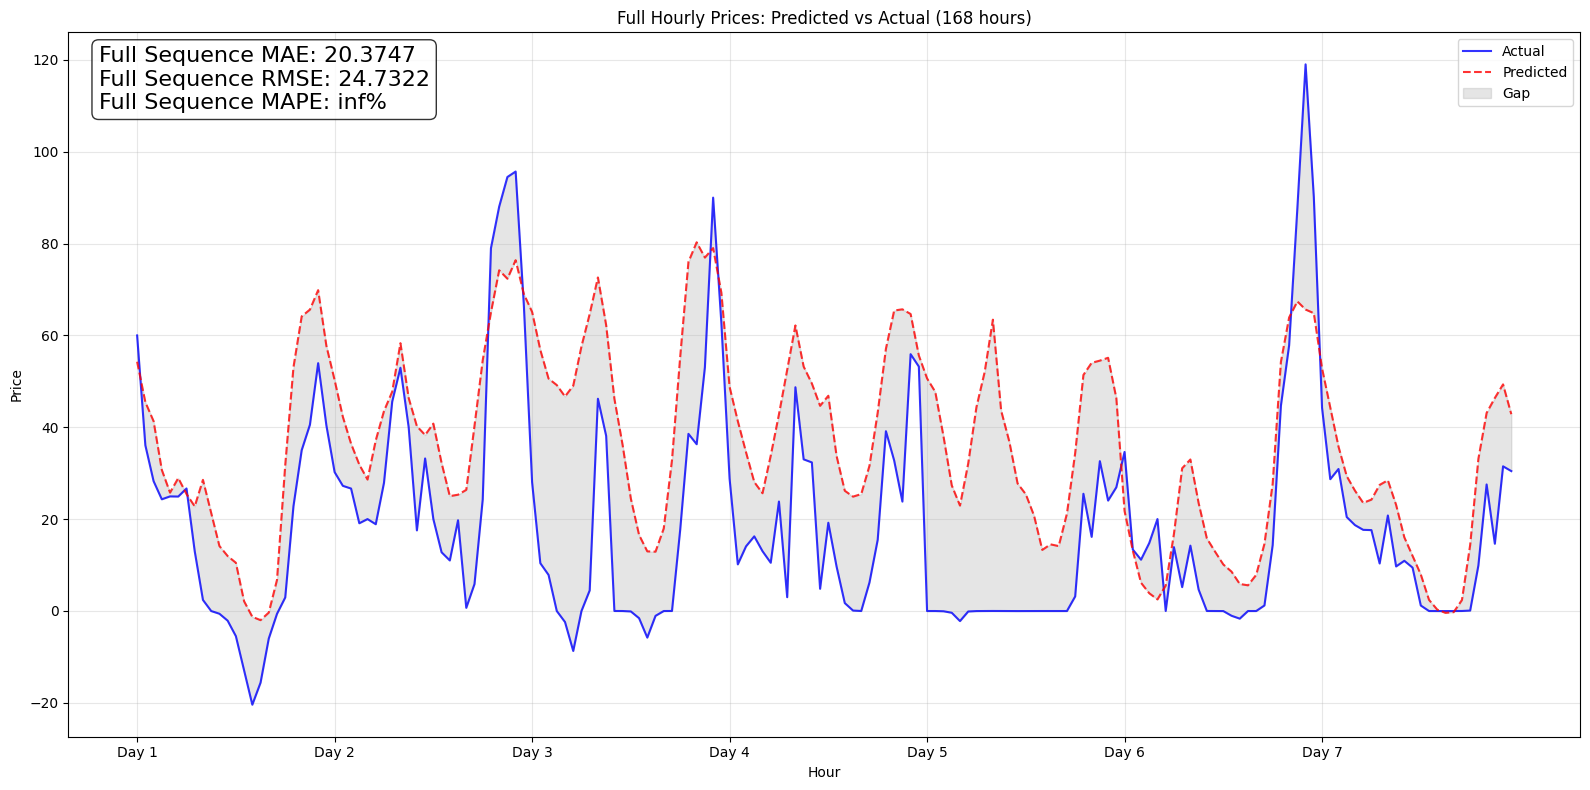

(array([ 6.0000e+01,  3.6070e+01,  2.8270e+01,  2.4320e+01,  2.4950e+01,
         2.4920e+01,  2.6680e+01,  1.3000e+01,  2.4000e+00, -1.0000e-02,
        -6.0000e-01, -2.1100e+00, -5.4800e+00, -1.2930e+01, -2.0410e+01,
        -1.5610e+01, -6.0000e+00, -6.2000e-01,  2.9400e+00,  2.2820e+01,
         3.5010e+01,  4.0550e+01,  5.3960e+01,  4.0410e+01,  3.0240e+01,
         2.7250e+01,  2.6660e+01,  1.9100e+01,  2.0010e+01,  1.8890e+01,
         2.7900e+01,  4.5590e+01,  5.2960e+01,  4.0010e+01,  1.7550e+01,
         3.3210e+01,  2.0000e+01,  1.2780e+01,  1.1000e+01,  1.9750e+01,
         6.8000e-01,  5.8600e+00,  2.4280e+01,  7.9010e+01,  8.8050e+01,
         9.4500e+01,  9.5690e+01,  6.6500e+01,  2.8030e+01,  1.0400e+01,
         7.8500e+00, -1.0000e-02, -2.4100e+00, -8.7100e+00, -1.0000e-02,
         4.4800e+00,  4.6210e+01,  3.8130e+01,  0.0000e+00, -1.0000e-02,
        -1.0000e-01, -1.5700e+00, -5.8000e+00, -1.0600e+00, -1.0000e-02,
         0.0000e+00,  1.7710e+01,  3.8570e+01,  3.6

In [13]:
X_future, X_past, y, X_future_transformed, X_past_transformed, past_times, future_times, future_window_dates = extract(
            date_from='01/06/2025', 
            date_to='07/06/2025', 
            preprocess_version=preprocess_version)

pred = model.predict(X_past_transformed, X_future_transformed)

model.plot_hourly_prices(y, pred)

In [14]:
data_dir = os.path.join(DATA_PATH, preprocess_version, 'classic')

X_past_test = np.load(os.path.join(data_dir, 'X_past_test.npy'))
X_future_test = np.load(os.path.join(data_dir, 'X_future_test.npy'))

X_past_test_transformed = np.load(os.path.join(data_dir, 'X_past_test_transformed.npy'))
X_future_test_transformed = np.load(os.path.join(data_dir, 'X_future_test_transformed.npy'))

y_test = np.load(os.path.join(data_dir, 'y_test.npy'))

test_past_times = pd.read_pickle(os.path.join(data_dir, 'test_past_times.pkl'))
test_future_times = pd.read_pickle(os.path.join(data_dir, 'test_future_times.pkl'))

test_future_window_dates = pd.read_pickle(os.path.join(data_dir, 'test_future_window_dates.pkl')) 

In [15]:
model.evaluate(X_past_test_transformed, X_future_test_transformed, y_test)

{'eval_rmse_train_space': 0.9917426426150389,
 'eval_metrics_train_space': [0.6371654868125916, 50928544.0],
 'rmse_original': 27.243173147159553,
 'mae_original': 20.412994672529443}